# Import Data Set

In [1]:
import pandas as pd
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Correlation

In [3]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

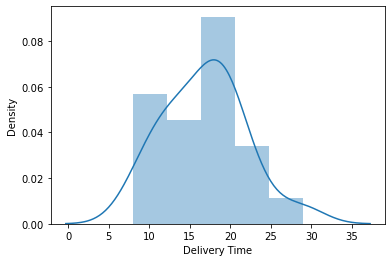

In [4]:
import seaborn as sns
sns.distplot(data['Delivery Time'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

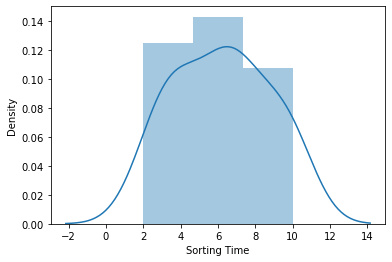

In [5]:
import seaborn as sns
sns.distplot(data['Sorting Time'])

In [8]:
import statsmodels.formula.api as smf
model = smf.ols("data['Delivery Time']~data['Sorting Time']",data = data).fit()
model

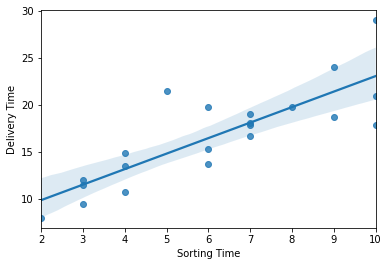

In [11]:
sns.regplot(x="Sorting Time", y="Delivery Time", data=data);

In [12]:
#Coefficients
model.params

Intercept               6.582734
data['Sorting Time']    1.649020
dtype: float64

In [13]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues) 

Intercept               3.823349
data['Sorting Time']    6.387447
dtype: float64 
 Intercept               0.001147
data['Sorting Time']    0.000004
dtype: float64


In [14]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     data['Delivery Time']   R-squared:                       0.682
Model:                               OLS   Adj. R-squared:                  0.666
Method:                    Least Squares   F-statistic:                     40.80
Date:                   Thu, 13 May 2021   Prob (F-statistic):           3.98e-06
Time:                           23:24:11   Log-Likelihood:                -51.357
No. Observations:                     21   AIC:                             106.7
Df Residuals:                         19   BIC:                             108.8
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.5827      1.722      3.823      0.001       2.979      10.186
data['Sorting Time']     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
Deliverd =  model.predict()
Deliverd

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

In [23]:
Deliverd_predict=pd.DataFrame(Deliverd, columns=['Salary_hike'])

In [25]:
Deliverd_predict

,Salary_hike
0,23.072933
1,13.178814
2,16.476853
3,21.423913
4,23.072933
5,16.476853
6,18.125873
7,11.529794
8,23.072933
9,21.423913


In [27]:
data['Deliverd_predict'] = Deliverd_predict


In [28]:
data

,Delivery Time,Sorting Time,Deliverd_predict
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913
